# Generating Visuals of Stock Price Movements 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
raw = pd.read_csv('Trading_Project_Data.csv', index_col = 0, parse_dates = True, header = [0,1])

names = ['AAPL', 'MSFT', 'GOOGL', 'NVDA', 'TSLA', 'JNJ', 'PFE', 'UNH', 'XOM', 'CVX', 'JPM', 'GS', 'AMZN', 'WMT', 'KO', 'NKE', 'BA', 'CAT', 'SOFI']

raw

/var/folders/ww/t2gpxbpj1dxghvgyxhxsyczm0000gn/T/ipykernel_73408/2366382853.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  raw = pd.read_csv('Trading_Project_Data.csv', index_col = 0, parse_dates = True, header = [0,1])


Price            Close                                                  \
Ticker            AAPL        AMZN          BA         CAT         CVX   
Date                                                                     
2024-01-22  192.944748  154.779999  214.929993  284.386902  136.604904   
2024-01-23  194.228455  156.020004  211.500000  284.544495  136.221420   
2024-01-24  193.551773  156.869995  214.130005  286.367065  138.934540   
2024-01-25  193.223389  157.750000  201.880005  296.307312  142.433807   
2024-01-26  191.481918  159.119995  205.470001  294.987213  142.980240   
...                ...         ...         ...         ...         ...   
2025-01-14  233.279999  217.759995  167.020004  370.212799  156.899994   
2025-01-15  237.869995  223.350006  166.199997  373.520691  158.330002   
2025-01-16  228.259995  220.660004  168.929993  379.159973  159.380005   
NaT                NaN         NaN         NaN         NaN         NaN   
NaT                NaN         NaN         NaN         NaN         NaN   

Price                                                                  ...  \
Ticker           GOOGL          GS         JNJ         JPM         KO  ...   
Date                                                                   ...   
2024-01-22  145.462692  376.831573  157.484207  166.308197  57.804554  ...   
2024-01-23  146.508896  371.764343  154.905838  165.213226  58.076252  ...   
2024-01-24  148.162903  370.426758  154.081940  166.689453  57.164120  ...   
2024-01-25  151.321442  373.648712  154.663498  169.074951  57.406708  ...   
2024-01-26  151.640289  368.854858  154.605347  168.429688  57.610481  ...   
...                ...         ...         ...         ...        ...  ...   
2025-01-14  189.660004  571.530029  144.750000  247.470001  62.040001  ...   
2025-01-15  195.550003  605.919983  144.970001  252.350006  61.770000  ...   
2025-01-16  192.910004  612.989990  147.770004  254.270004  62.250000  ...   
NaT                NaN         NaN         NaN         NaN        NaN  ...   
NaT                NaN         NaN         NaN         NaN        NaN  ...   

Price          Volume                                                   \
Ticker            MCD        MSFT         NKE         NVDA         PFE   
Date                                                                     
2024-01-22  3250200.0  27016900.0   9897400.0  452955000.0  41663900.0   
2024-01-23  1874000.0  20525900.0   8208000.0  294654000.0  33466700.0   
2024-01-24  3209700.0  24867000.0   7879300.0  560271000.0  42720700.0   
2024-01-25  3219600.0  21021200.0  10063700.0  482777000.0  47605500.0   
2024-01-26  4210500.0  17803300.0   9735800.0  390309000.0  47073800.0   
...               ...         ...         ...          ...         ...   
2025-01-14  2238900.0  16935900.0  16732900.0  195590500.0  25856900.0   
2025-01-15  2867800.0  19637800.0  13468100.0  185217300.0  35949700.0   
2025-01-16  3403700.0  15300000.0  13694600.0  209235600.0  29981100.0   
NaT               NaN         NaN         NaN          NaN         NaN   
NaT               NaN         NaN         NaN          NaN         NaN   

Price                                                                    
Ticker            SOFI         TSLA         UNH         WMT         XOM  
Date                                                                     
2024-01-22  69046700.0  117952500.0   5922900.0  13938300.0  19955900.0  
2024-01-23  45600700.0  106605900.0   2672900.0  12066600.0  15863400.0  
2024-01-24  41431000.0  123369900.0   2918800.0  22932900.0  17330600.0  
2024-01-25  49509400.0  198076800.0  14671000.0  16369500.0  22089500.0  
2024-01-26  72566000.0  107343200.0   6212200.0  15746400.0  20817200.0  
...                ...          ...         ...         ...         ...  
2025-01-14  34100800.0   84565000.0   3978300.0  13549200.0  11191200.0  
2025-01-15  38873100.0   81375500.0   4103900.0  17348200.0  14521100.0  
2025-01-16  4358690

In [36]:
corr_matrix = raw[['Close']].corr()
corr_matrix

Price            Close                                                    \
Ticker            AAPL      AMZN        BA       CAT       CVX     GOOGL   
Price Ticker                                                               
Close AAPL    1.000000  0.664363 -0.553386  0.484829 -0.128919  0.689136   
      AMZN    0.664363  1.000000 -0.453249  0.622779  0.344057  0.771998   
      BA     -0.553386 -0.453249  1.000000 -0.783960 -0.193914 -0.387094   
      CAT     0.484829  0.622779 -0.783960  1.000000  0.385819  0.349591   
      CVX    -0.128919  0.344057 -0.193914  0.385819  1.000000  0.330968   
      GOOGL   0.689136  0.771998 -0.387094  0.349591  0.330968  1.000000   
      GS      0.875967  0.802896 -0.715932  0.716048  0.212808  0.728049   
      JNJ     0.173075 -0.362259 -0.249495  0.159585 -0.492905 -0.478299   
      JPM     0.826109  0.818735 -0.705850  0.754034  0.242119  0.678615   
      KO      0.628657  0.074593 -0.629421  0.364198 -0.328747  0.210156   
      MCD     0.377972  0.240920 -0.375999  0.515232 -0.303983 -0.170484   
      MSFT    0.516961  0.593157 -0.166160  0.226256  0.190061  0.662093   
      NKE    -0.780828 -0.584179  0.629615 -0.505562 -0.084176 -0.673071   
      NVDA    0.852989  0.722654 -0.719498  0.650642  0.165672  0.738776   
      PFE     0.369913 -0.183071 -0.199344  0.006789 -0.340004  0.127568   
      SOFI    0.621632  0.817820 -0.400349  0.615222  0.215928  0.478464   
      TSLA    0.790977  0.875317 -0.396315  0.528861  0.073500  0.655989   
      UNH     0.651259  0.159163 -0.653283  0.494470 -0.118763  0.147537   
      WMT     0.897180  0.810937 -0.714252  0.720746  0.052742  0.643400   
      XOM     0.257649  0.216141 -0.785453  0.707967  0.453385  0.302243   

Price                                                                     \
Ticker              GS       JNJ       JPM        KO       MCD      MSFT   
Price Ticker                                                               
Close AAPL    0.875967  0.173075  0.826109  0.628657  0.377972  0.516961   
      AMZN    0.802896 -0.362259  0.818735  0.074593  0.240920  0.593157   
      BA     -0.715932 -0.249495 -0.705850 -0.629421 -0.375999 -0.166160   
      CAT     0.716048  0.159585  0.754034  0.364198  0.515232  0.226256   
      CVX     0.212808 -0.492905  0.242119 -0.328747 -0.303983  0.190061   
      GOOGL   0.728049 -0.478299  0.678615  0.210156 -0.170484  0.662093   
      GS      1.000000  0.039512  0.976952  0.491006  0.383156  0.401466   
      JNJ     0.039512  1.000000  0.049658  0.640154  0.564408 -0.295967   
      JPM     0.976952  0.049658  1.000000  0.443654  0.402648  0.388931   
      KO      0.491006  0.640154  0.443654  1.000000  0.331544  0.148252   
      MCD     0.383156  0.564408  0.402648  0.331544  1.000000 -0.236923   
      MSFT    0.401466 -0.295967  0.388931  0.148252 -0.236923  1.000000   
      NKE    -0.805806 -0.092208 -0.795789 -0.551117 -0.083545 -0.406577   
      NVDA    0.887979  0.025535  0.873267  0.547041  0.218746  0.581859   
      PFE     0.162286  0.541980  0.102896  0.747582 -0.021714  0.134457   
      SOFI    0.783964 -0.118380  0.804094  0.002887  0.564052  0.210309   
      TSLA    0.842566 -0.135581  0.841869  0.168399  0.449558  0.402608   
      UNH     0.641875  0.658033  0.587671  0.777263  0.516754 -0.010593   
      WMT     0.951904  0.122118  0.947608  0.533364  0.516860  0.417135   
      XOM     0.473255  0.161561  0.484182  0.520542  0.032622  0.126088   

Price                                                                     \
Ticker             NKE      NVDA       PFE      SOFI      TSLA       UNH   
Price Ticker                                                               
Close AAPL   -0.780828  0.852989  0.369913  0.621632  0.790977  0.651259   
      AMZN   -0.584179  0.722654 -0.183071  0.817820  0.875317  0.159163   
      BA      0.629615 -0.719498 -0.199344 -0.400349 -0.396315 -0.653283   
      CAT    -0.505562  0.650642  0.006789  0.

<Axes: xlabel='Price-Ticker', ylabel='Price-Ticker'>

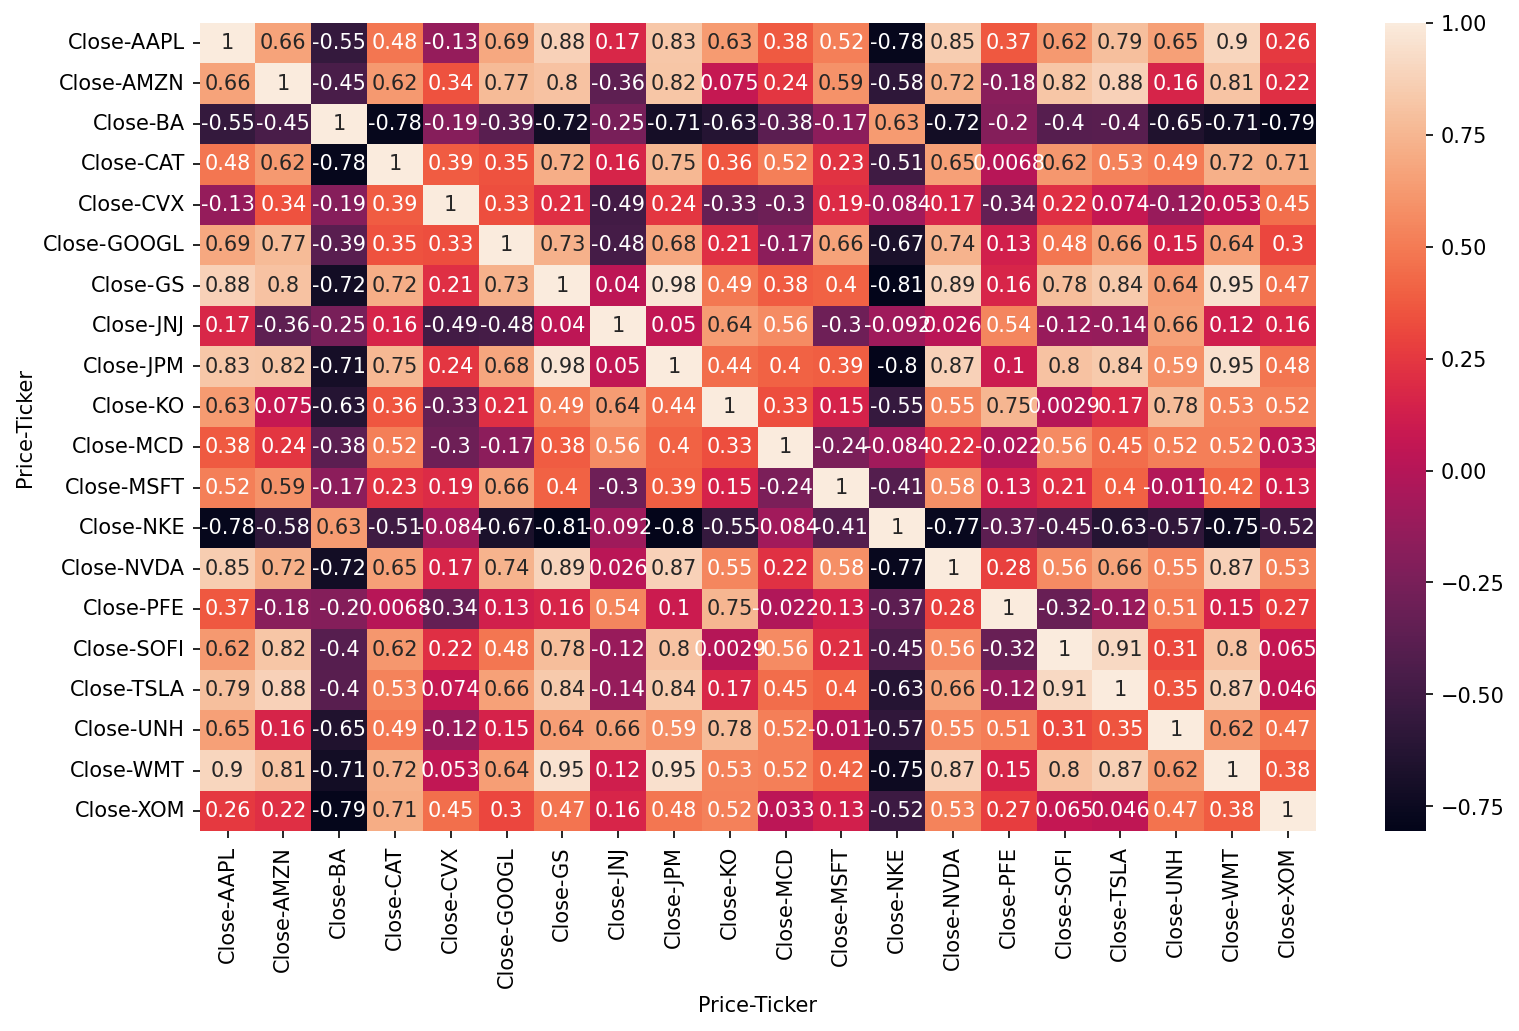

In [37]:
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize=(12, 7), dpi=150)
sn.heatmap(corr_matrix, annot = True)

In [ ]:
# Testing to see if pairs trading possible on JP and GS due to their potential correlation (Both investment banks) 
gs_jp = pd.DataFrame(raw['Close']['TSLA'])


In [41]:
gs_jp['JPM'] = raw['Close']['JPM']

In [42]:
gs_jp = gs_jp.dropna()
gs_jp

,GS,JPM
Date,,
2024-01-22,376.831573,166.308197
2024-01-23,371.764343,165.213226
2024-01-24,370.426758,166.689453
2024-01-25,373.648712,169.074951
2024-01-26,368.854858,168.429688
...,...,...
2025-01-10,560.000000,239.869995
2025-01-13,562.950012,244.210007
2025-01-14,571.530029,247.470001


<Axes: xlabel='Date'>

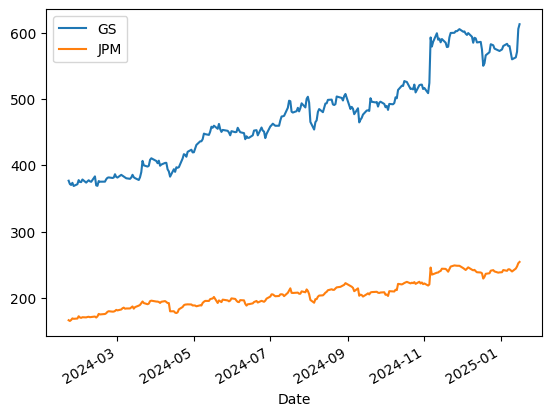

In [43]:
# plotting stock prices 

gs_jp.plot()

In [44]:
gs_jp.corr()

,GS,JPM
GS,1.000000,0.976952
JPM,0.976952,1.000000


In [13]:
import statsmodels.tsa.stattools as ts

In [47]:
coin_result = ts.coint(gs_jp['GS'], gs_jp['JPM']) 
coin_result[1]

0.03770384566775378

In [26]:
from sklearn import preprocessing 

In [ ]:
normailised_data = preprocessing.StandardScaler().fit_transform(gs_jp) 

# Standardising data 

<Axes: >

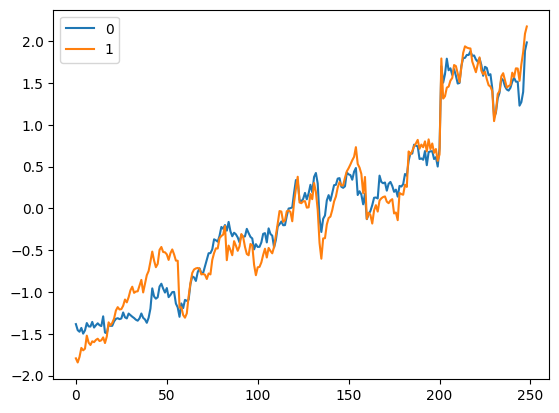

In [32]:
df = pd.DataFrame(normailised_data)

df.plot()

Text(0.5, 1.0, 'Spread between GS and JPM')

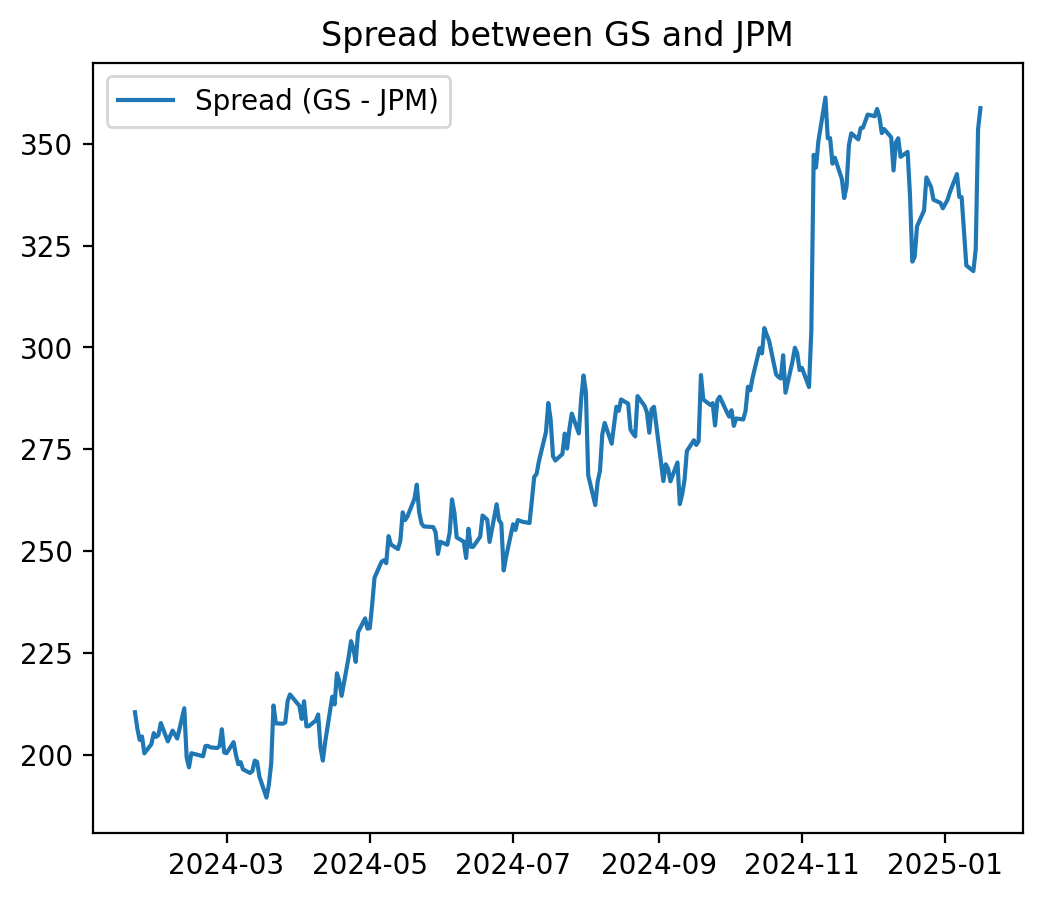

In [51]:
figure(figsize=(6, 5), dpi=200)
plt.plot(gs_jp['GS']-gs_jp['JPM'], label = 'Spread (GS - JPM)')
plt.legend()
plt.title("Spread between GS and JPM")
